# Gradient Descent 
Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from copy import deepcopy
import math
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])
print(np.c_[X_train,y_train])

[[0.5 1.5 0. ]
 [1.  1.  0. ]
 [1.5 0.5 0. ]
 [3.  0.5 1. ]
 [2.  2.  1. ]
 [1.  2.5 1. ]]


[[3.  0.5]
 [2.  2. ]
 [1.  2.5]]
[[3.  0.5 0.5 1.5]
 [2.  2.  1.  1. ]
 [1.  2.5 1.5 0.5]]


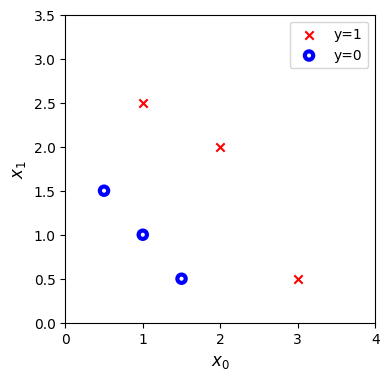

In [2]:
fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=True)

def plot_data(X,y,ax,pos_label="y=1",neg_label="y=0"):
    pos = y == 1 
    neg = y == 0 
    print(X[pos])
    print(np.c_[X[pos,0],X[pos,1],X[neg,0],X[neg,1]])
    ax.scatter(X[pos,0],X[pos,1],c='r',marker='x',label=pos_label)
    ax.scatter(X[neg,0],X[neg,1],marker='o',label=neg_label,edgecolors="blue",facecolors="none",linewidths=3)

plot_data(X_train,y_train,ax)
ax.axis([0,4,0,3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.legend()
plt.show()

In [3]:
def sigmoid(z):
    """ 
    computes sigmoid of the z 
    args 
    z : scalar value 
    returns 
    1/1+(e^-z) 
    """ 
    # np.clip(z,-500,500)
    return 1 / (1 + np.exp(-z))

In [4]:
def compute_cost_logistic(X,y,w,b):
    """ 
    Computes cost function for logistic function 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0

    for i in range(m):
      z_i = np.dot(X[i],w) + b 
      f_wb_i = sigmoid(z_i)
      loss_i = -(y[i] * np.log(f_wb_i) +(1-y[i]) * np.log(1-f_wb_i))
      cost += loss_i

    return cost/m

In [5]:
def compute_gradient_logistic(X,y,w,b):
    """ 
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """ 
    n,m = X.shape
    dj_dw = np.zeros((m,)) 
    dj_db = 0.

    for i in range(n):
        f_wb_i = sigmoid(np.dot(X[i],w) + b )
        err_i = f_wb_i - y[i]
        for j in range(m):
            dj_dw[j] += err_i * X[i,j]
        dj_db += err_i
    
    dj_dw /= n
    dj_db /= n 

    return dj_dw,dj_db

In [6]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp,dj_db_tmp = compute_gradient_logistic(X_tmp,y_tmp,w_tmp,b_tmp)
print(dj_dw_tmp,dj_db_tmp)

[0.49833339 0.49883943] 0.49861806546328574


In [7]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    J_history = []
    w_fin = deepcopy(w_in)
    b_fin = b_in 
    for i in range(num_iters):
      
      dj_dw, dj_db = compute_gradient_logistic(X,y,w_fin,b_fin)
      w_fin = w_fin - alpha * dj_dw
      b_fin = b_fin - alpha * dj_db 

      # Save cost J at each iteration
      if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w_fin, b_fin))

        # Print cost every at intervals 10 times or as many iterations if < 10
      if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w_fin,b_fin 
        

In [8]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 1e-1
iters = 10000
w_fin , b_fin = gradient_descent(X_train,y_train,w_tmp,b_tmp,alpha,iters) 
print(w_fin,b_fin)

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   
[5.28123029 5.07815608] -14.222409982019837


In [9]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

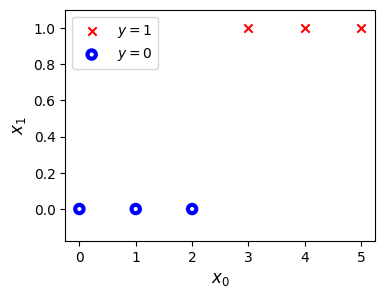

In [10]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
pos = y_train == 1 
neg = y_train == 0 
ax.scatter(x_train[pos],y_train[pos],c='r',label = "$y = 1$",marker='x',)
ax.scatter(x_train[neg],y_train[neg],marker='o',label = "$y = 0$",edgecolors="blue",facecolors="none",linewidths=3)
# ax.axis([0,5,0,1])
ax.set_ylim(-0.175,1.1)
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.legend()
plt.show()

In [11]:
w_range = np.array([-1, 7])
b_range = np.array([1, -14])
cost = compute_cost_logistic(x_train,y_train,w)

NameError: name 'w' is not defined